In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-dataset/SuperStore_Sales_Dataset.csv


In [9]:
import pandas as pd
df = pd.read_csv("/kaggle/input/store-dataset/SuperStore_Sales_Dataset.csv")
print(df.head())

   Row ID+O6G3A1:R6        Order ID  Order Date   Ship Date       Ship Mode  \
0              4918  CA-2019-160304  01-01-2019  07-01-2019  Standard Class   
1              4919  CA-2019-160304  02-01-2019  07-01-2019  Standard Class   
2              4920  CA-2019-160304  02-01-2019  07-01-2019  Standard Class   
3              3074  CA-2019-125206  03-01-2019  05-01-2019     First Class   
4              8604  US-2019-116365  03-01-2019  08-01-2019  Standard Class   

  Customer ID      Customer Name    Segment        Country          City  ...  \
0    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg  ...   
1    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg  ...   
2    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg  ...   
3    LR-16915       Lena Radford   Consumer  United States   Los Angeles  ...   
4    CA-12310  Christine Abelman  Corporate  United States   San Antonio  ...   

          Category Sub-Category  \
0  

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


/tmp/ipykernel_35/3454530897.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Sales', estimator=sum, ci=None, palette='Greens')


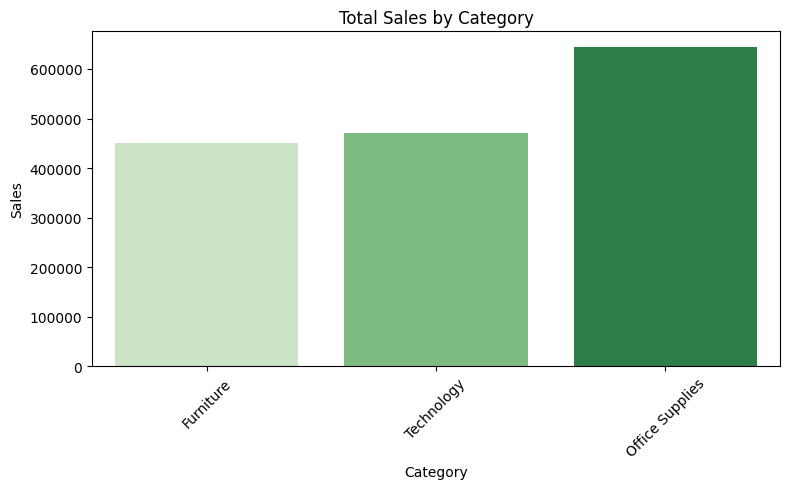

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Category', y='Sales', estimator=sum, ci=None, palette='Greens')
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


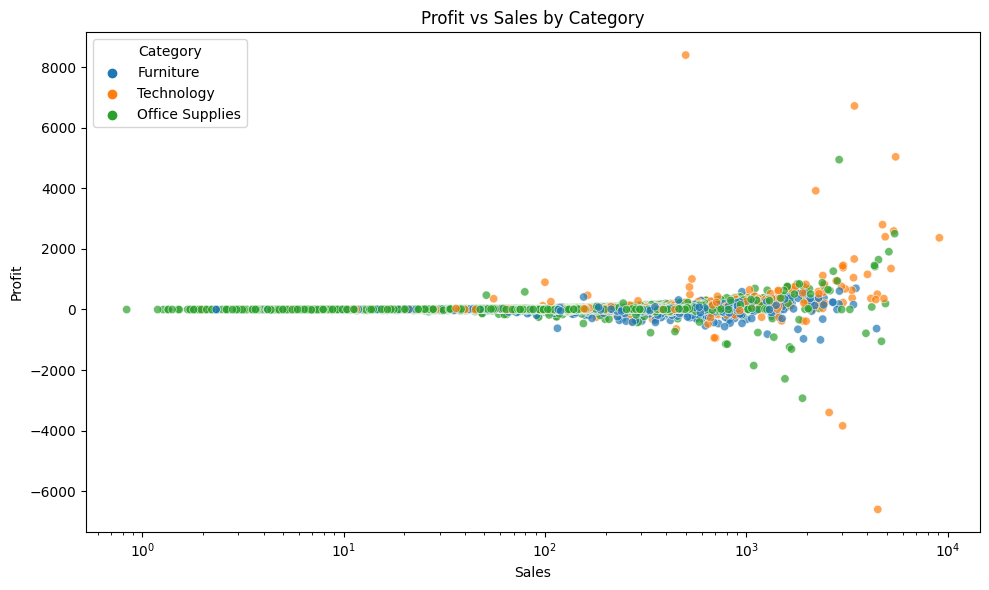

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', alpha=0.7)
plt.title('Profit vs Sales by Category')
plt.xscale('log')  # Optional if sales are skewed
plt.tight_layout()
plt.show()


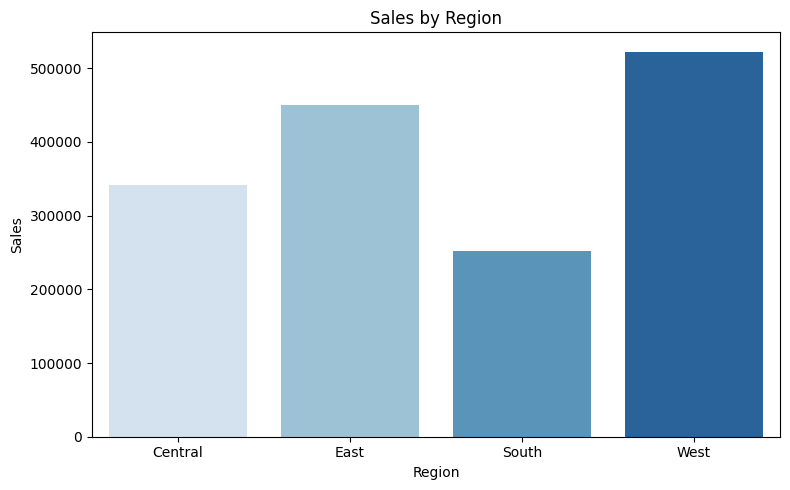

In [12]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=region_sales, x='Region', y='Sales', palette='Blues')
plt.title('Sales by Region')
plt.tight_layout()
plt.show()


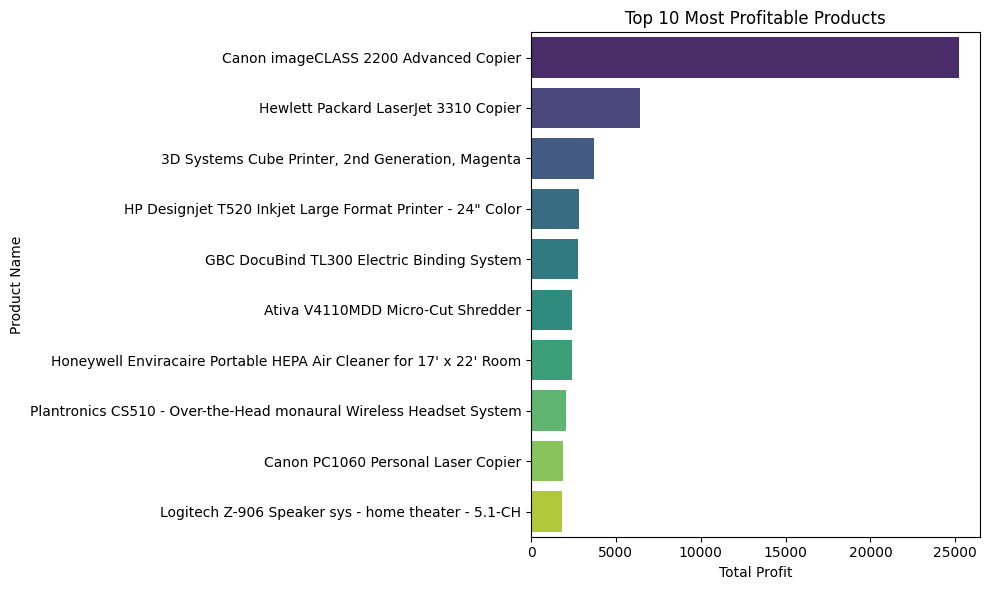

In [14]:
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit')
plt.tight_layout()
plt.show()


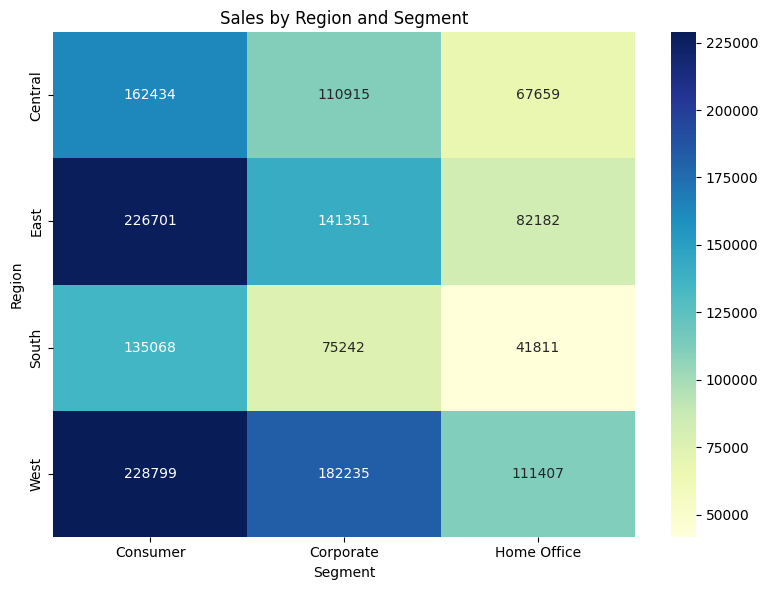

In [15]:
heatmap_data = df.pivot_table(index='Region', columns='Segment', values='Sales', aggfunc='sum')

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Sales by Region and Segment')
plt.tight_layout()
plt.show()
